<a href="https://colab.research.google.com/github/veritaem/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [78]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 4.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(0, 4)

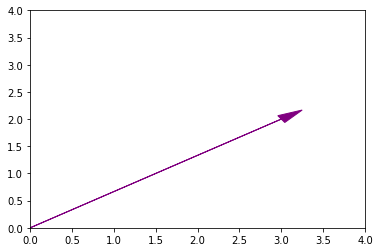

In [2]:
a = [3, 2]
plt.arrow(0, 0, a[0], a[1], color = 'purple', head_width = .15, head_length = .3)
plt.xlim(0,4)
plt.ylim(0, 4)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = [17, -4, -2, 1]
np.linalg.norm(b)

17.60681686165901

The norm is just the length of a vector.  

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]

np.dot(c, d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
e = np.mat('7 4 2; 1 3 -1; 2 6 -4')
print(np.linalg.inv(e))

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


In [6]:
e.T

matrix([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [7]:


customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [8]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [9]:
np.var(df['customers'])

84653.06122448981

In [10]:
np.var(df['snow'])

7.346938775510203

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Amounts aren't standardized, so the variance of snow is only going up by a few a day, whereas customers can be hundreds. 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [11]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [12]:
df.corr()
#standardized

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [13]:
# Let me get you some data to start you off.

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
X = df.drop('Country', axis=1)
X.head()

In [0]:
numpy_X = X.values
print(numpy_X)

In [0]:
stds = np.std(X.T, axis = 1)

In [0]:
means = np.mean(X.T, axis=1)
fiX = X - means
stdX = fiX / stds
stdX

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

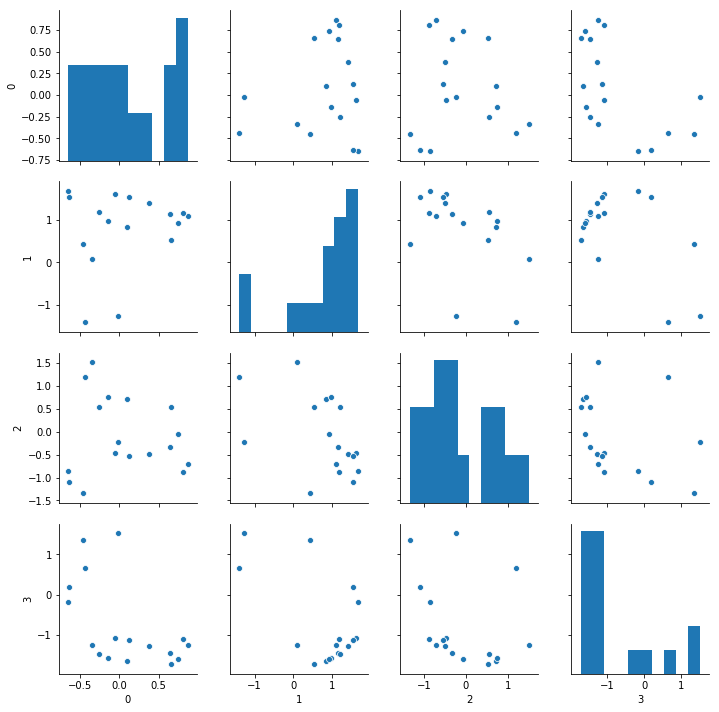

In [25]:
#pairplotting it out to look at how the data has been changed now
sns.pairplot(stdX.T)

In [47]:
stdXt = stdX.T
pca = PCA()
pca.fit(stdXt)
print(" Eigenvectors:", pca.components_)
print(" Eigenvalues:",pca.explained_variance_)
print(['{:.2%}'.format(x) for x in pca.explained_variance_ratio_])
neX = pca.transform(stdXt)
neXt = pd.DataFrame(neXt)

#the first two variables describe most of the variance, so I guess I shall just use those!

 Eigenvectors: [[-0.2102434  -0.57051941 -0.01304767  0.79381048]
 [ 0.03829331 -0.49977799  0.79743076 -0.33594608]
 [ 0.8392445  -0.41800666 -0.33754102 -0.08369682]
 [ 0.5         0.5         0.5         0.5       ]]
 Eigenvalues: [1.61385634e+00 1.04134534e+00 2.74464786e-01 4.43595833e-32]
['55.09%', '35.54%', '9.37%', '0.00%']


In [48]:
neXt.columns = {'cheese', 'carcass_meat', 'other meat', 'fish', 'fats and oils', 'sugars', 'potatoes', 'fresh veg', 'other veg', 'proc_potatoes', 'proc_veg', 'fruit', 'cereals', 'bev', 'soft drinks', 'alcohol', 'confectionary'}
neXt

,fats and oils,other meat,other veg,soft drinks,fish,cheese,sugars,fresh veg,proc_potatoes,alcohol,confectionary,cereals,potatoes,proc_veg,carcass_meat,fruit,bev
0,-7.513351e-01,-6.858914e-01,3.024336e+00,1.266985e-01,-7.434988e-01,-7.037884e-01,5.054778e-01,-8.708051e-01,-8.810385e-01,2.016084e+00,-7.052318e-01,-7.330379e-01,-8.103505e-01,8.277984e-02,-6.174299e-01,2.472867e+00,-7.258361e-01
1,9.305681e-01,-5.956296e-01,1.619726e-01,-1.268914e+00,9.828947e-01,8.531357e-01,-1.514649e+00,-1.068699e-01,2.755285e-01,-1.536780e+00,-4.435237e-01,5.398551e-01,-4.337883e-01,1.792457e+00,-6.693502e-01,1.633776e+00,-6.006823e-01
2,-2.006677e-01,-3.016070e-01,6.343082e-01,-7.731989e-01,4.581639e-01,-4.751280e-01,-6.529254e-01,4.596844e-01,5.502741e-01,-5.620294e-02,7.771470e-01,-6.126278e-01,1.717822e-01,-5.568215e-01,7.405341e-01,-6.875099e-02,-9.396377e-02
3,-1.289674e-16,-1.966552e-16,6.218701e-17,-4.300599e-17,-6.238171e-17,-3.238817e-17,-4.963946e-17,-1.620106e-16,-1.935125e-16,9.081052e-17,-4.019272e-18,-1.034761e-16,-1.367940e-16,-1.689790e-18,-1.120375e-16,-1.441319e-17,-1.332520e-16


In [88]:
pca = PCA(2)
pca.fit(stdXt)
print(" Eigenvectors:", pca.components_)
print(" Eigenvalues:",pca.explained_variance_)
print(['{:.2%}'.format(x) for x in pca.explained_variance_ratio_])
neX2 = pca.transform(stdXt)
neXt2 = pd.DataFrame(neXt)
neXt3 = neXt2.T


 Eigenvectors: [[-0.2102434  -0.57051941 -0.01304767  0.79381048]
 [ 0.03829331 -0.49977799  0.79743076 -0.33594608]]
 Eigenvalues: [1.61385634 1.04134534]
['55.09%', '35.54%']


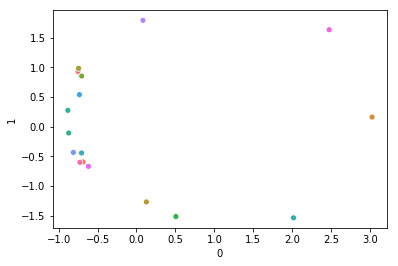

In [100]:
sns.scatterplot(neXt3[0], neXt3[1], hue = neXt.columns, legend = False)


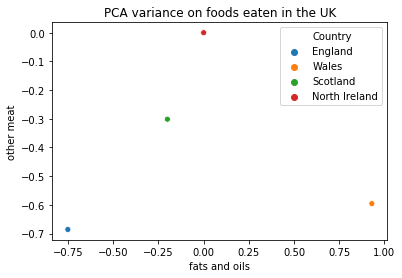

In [52]:
sns.scatterplot(neXt['fats and oils'], neXt['other meat'], hue = df.Country).set_title('PCA variance on foods eaten in the UK');
#i tried a lot of things to make this more than 4 points, but my math seems ok.  Guess its just a boring-ish dataset(i hope).

#transposing it gave me a more exciting graph but threw an error anytime i tried to attach the countries to it, which 

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [120]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

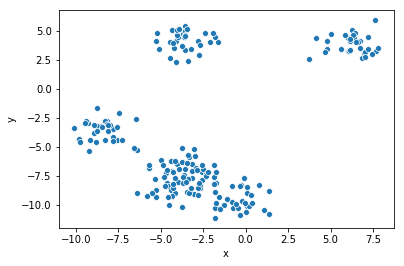

In [122]:
sns.scatterplot(points.x, points.y)
# 5 distinct clusters here

In [0]:
df_points = StandardScaler().fit_transform(points)
Km_points = pd.DataFrame(df_points) 
Km_points
#doing the scaling

In [0]:
ex = Km_points[0].values
why = Km_points[1].values
#getting my x and y separating, and using slightly flippant names so I dont accidentally reuse an old one

In [126]:
pca = PCA(2)
pca.fit(Km_points)
print(" Eigenvectors:", pca.components_)
print(" Eigenvalues:",pca.explained_variance_)
print(['{:.2%}'.format(x) for x in pca.explained_variance_ratio_])
new = pca.transform(Km_points)
newr = pd.DataFrame(new)
newr.columns = {'x', 'y'}
newr
#why are these switched?  if i have time ill come back to it


 Eigenvectors: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
 Eigenvalues: [1.37359373 0.63645652]
['68.34%', '31.66%']


,y,x
0,-0.859119,-0.859524
1,-0.631241,0.248206
2,-0.462188,1.125087
3,-0.863236,-0.405686
4,-0.561522,1.034245
5,-0.757861,-0.067900
6,-0.927228,-0.876106
7,-0.825164,-0.986458
8,0.927155,-1.314650
9,-0.956370,-0.097936


In [0]:
centroids1 = newr.sample(5)


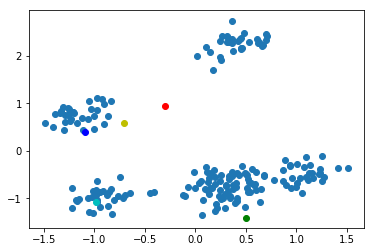

In [129]:
ax = plt.subplot(1,1,1)
ax.scatter(newr.x, newr.y)
ax.plot(centroids1.iloc[0].y, centroids1.iloc[0].x, "or")
ax.plot(centroids1.iloc[1].y, centroids1.iloc[1].x, "og")
ax.plot(centroids1.iloc[2].y, centroids1.iloc[2].x, "oy")
ax.plot(centroids1.iloc[3].y, centroids1.iloc[3].x, "ob")
ax.plot(centroids1.iloc[4].y, centroids1.iloc[4].x, "oc")

In [0]:
import math
from scipy.spatial import distance


In [0]:
def find_nearest_centroid(df, centroids, iteration):
  distances = distance.cdist(df, centroids, 'euclidean')
  nearest_centroids = np.argmin(distances, axis=1)
  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [0]:
first = find_nearest_centroid(newr, centroids1, '1')
first.head()

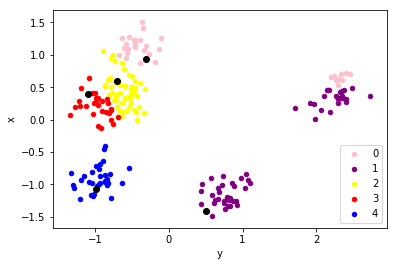

In [132]:
def plot_clusters(df, column_header, centroids1):
  colors = {0:'pink', 1:'purple', 2:'yellow', 3:'red', 4:'blue'}
  fig, ax = plt.subplots()
  ax.plot(centroids1.iloc[0].y, centroids1.iloc[0].x, "ok")
  ax.plot(centroids1.iloc[1].y, centroids1.iloc[1].x, "ok")
  ax.plot(centroids1.iloc[2].y, centroids1.iloc[2].x, "ok")
  ax.plot(centroids1.iloc[3].y, centroids1.iloc[3].x, "ok")
  ax.plot(centroids1.iloc[4].y, centroids1.iloc[4].x, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='y', y='x', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first, 'cluster_1', centroids1)

In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids
centroids = get_centroids(first, 'cluster_1')

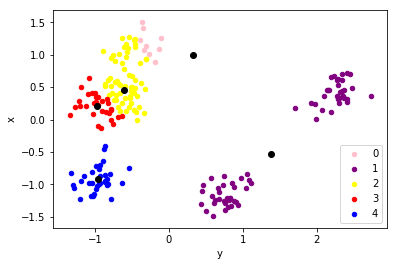

In [137]:
centroids = get_centroids(first, 'cluster_1')
second_pass = find_nearest_centroid(first.select_dtypes(exclude='int64'), centroids, '2')
plot_clusters(second_pass, 'cluster_2', centroids)

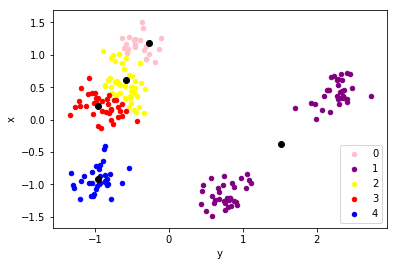

In [138]:
centroids = get_centroids(second_pass, 'cluster_2')
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')
plot_clusters(third_pass, 'cluster_3', centroids)

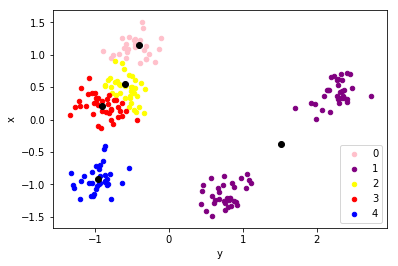

In [139]:
centroids = get_centroids(third_pass, 'cluster_3')
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')
plot_clusters(fourth_pass, 'cluster_4', centroids)

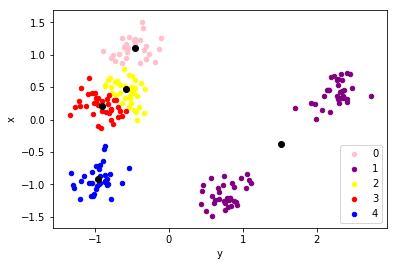

In [140]:
centroids = get_centroids(fourth_pass, 'cluster_4')
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')
plot_clusters(fifth_pass, 'cluster_5', centroids)